In [6]:
# importing libraries
import numpy as np
import pandas as pd

import acquire
import prepare

import matplotlib.pyplot as plt
import seaborn as sns

## Removing non-english strings

In [2]:
# def isEnglish(s):
#     try:
#         s.encode(encoding='utf-8').decode('ascii')
        
#     except UnicodeDecodeError:
#         return False
#     else:
#         return True

In [3]:
## testing function
#isEnglish(df.readme_contents[3])

In [4]:
# df[df.readme_contents.apply(isEnglish) == True]

# Importing clean data

In [3]:
# importing csv and reading to df

csv = 'NLP.csv'

df = pd.read_csv(csv)

df.head()

,Unnamed: 0,repo,language,readme_contents,clean,stemmed,lemmatized
0,0,python-discord/bot,Python,# Python Utility Bot\n\n[![Discord][7]][8]\n[!...,python utility bot discord78 lint test12 build...,python util bot discord78 lint test12 build34 ...,python util bot discord78 lint test12 build34 ...
1,4,microsoft/BotBuilder-Samples,JavaScript,\r\n# ![Bot Framework Samples](./docs/media/Bo...,bot framework samplesdocsmediabotframeworksamp...,bot framework samplesdocsmediabotframeworksamp...,bot framework samplesdocsmediabotframeworksamp...
2,5,GAwesomeBot/bot,JavaScript,# GAwesomeBot\n[![Travis Status](https://travi...,gawesomebot travis statushttpstravisciorggilbe...,gawesomebot travi statushttpstravisciorggilber...,gawesomebot travi statushttpstravisciorggilber...
3,6,roughike/BottomBar,Java,# BottomBar (Deprecated)\n\nI don't have time ...,bottombar deprecated dont time maintain anymor...,bottombar deprec dont time maintain anymor bas...,bottombar deprec dont time maintain anymor bas...
4,7,mithun-prasad/Bot,C#,# Developing and Deploying Intelligent Chat Bo...,developing deploying intelligent chat bots tra...,develop deploy intellig chat bot train resourc...,develop deploy intellig chat bot train resourc...


## Univariate Analysis of Target Frequency

In [30]:
# language counts
df.groupby('language').agg('count')['lemmatized'].sort_values(ascending = False)

language
Python        110
JavaScript     55
Java           24
C#             19
TypeScript     17
Name: lemmatized, dtype: int64

In [8]:
# language frequency
df.language.value_counts(normalize = True)

Python        0.491228
JavaScript    0.241228
Java          0.105263
C#            0.087719
TypeScript    0.074561
Name: language, dtype: float64

In [48]:
# grouping the data by language and looking at the distribution of languages
df_lang_freq = pd.DataFrame(df.groupby('language').agg('count')['lemmatized'])\
            .rename(columns = {'lemmatized':'count'}).sort_values(by = 'count', ascending = False)

# adding frequency column to df
df_lang_freq['freq'] = df.language.value_counts(normalize = True).round(2)

# view df
df_lang_freq

,count,freq
language,,
Python,110,0.49
JavaScript,55,0.24
Java,24,0.11
C#,19,0.09
TypeScript,17,0.07


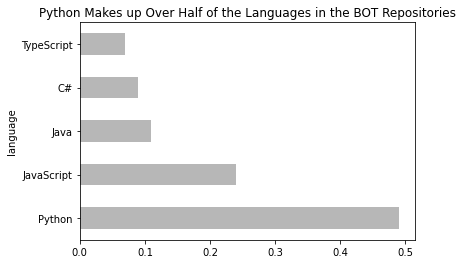

In [49]:
df_lang_freq.freq.plot.barh(color = '#b7b7b7ff')
plt.title('Python Makes up Over Half of the Languages in the BOT Repositories')
plt.show();

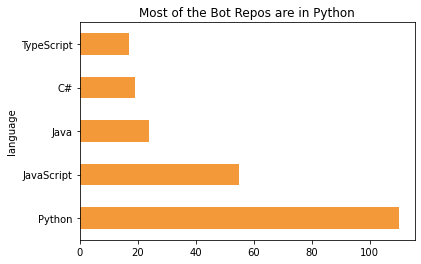

In [41]:
# plotting the language distribution of the data
df_lang_freq['count'].plot.barh(color = '#f3993aff')
plt.title('Most of the Bot Repos are in Python')
plt.show()

# Takeaways
- **Python** is the most represented of all of the languages
- **JavaScript** is the next most represented making up about half as many as **Python**
- The remaining 3: **Java**, **C#**, and **TypeScript** have close to the same count

# Splitting data

In [50]:
# calling split function from prepare module 
train, validate, test = prepare.split_data(df)

In [51]:
# verifying size of each df
train.shape, validate.shape, test.shape

((127, 7), (55, 7), (46, 7))

In [52]:
# previewing train
train.head()

,Unnamed: 0,repo,language,readme_contents,clean,stemmed,lemmatized
222,580,botgram/botgram,JavaScript,[![Botgram](./docs/splash.png)](https://botgra...,botgramdocssplashpnghttpsbotgramjsorg bots spe...,botgramdocssplashpnghttpsbotgramjsorg bot spec...,botgramdocssplashpnghttpsbotgramjsorg bot spec...
97,244,odysseusmax/animated-lamp,Python,# [Screenshotit_bot](https://tx.me/screenshoti...,screenshotit_bothttpstxmescreenshotit_bot tele...,screenshotit_bothttpstxmescreenshotit_bot tele...,screenshotit_bothttpstxmescreenshotit_bot tele...
182,479,agermanidis/SnapchatBot,Python,<h1 style='color: red'>This repo is deprecated...,h1 stylecolor redthis repo deprecated due chan...,h1 stylecolor redthi repo deprec due chang sna...,h1 stylecolor redthi repo deprec due chang sna...
108,270,NotSoSuper/NotSoBot,Python,# NotSoBot\n### Requires:\n- Python 3.5\n- [di...,notsobot requires python 35 discordpyhttpsgith...,notsobot requir python 35 discordpyhttpsgithub...,notsobot requir python 35 discordpyhttpsgithub...
176,467,boto/boto3-sample,Python,=========================\nBoto 3 Sample Appli...,boto 3 sample application application implemen...,boto 3 sampl applic applic implement drop vide...,boto 3 sampl applic applic implement drop vide...


In [53]:
# dropping the duplicate index col

for df in train, validate, test:
    df.drop(columns = ['Unnamed: 0'], inplace = True)

In [65]:
train.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
222,botgram/botgram,JavaScript,[![Botgram](./docs/splash.png)](https://botgra...,botgramdocssplashpnghttpsbotgramjsorg bots spe...,botgramdocssplashpnghttpsbotgramjsorg bot spec...,botgramdocssplashpnghttpsbotgramjsorg bot spec...
97,odysseusmax/animated-lamp,Python,# [Screenshotit_bot](https://tx.me/screenshoti...,screenshotit_bothttpstxmescreenshotit_bot tele...,screenshotit_bothttpstxmescreenshotit_bot tele...,screenshotit_bothttpstxmescreenshotit_bot tele...
182,agermanidis/SnapchatBot,Python,<h1 style='color: red'>This repo is deprecated...,h1 stylecolor redthis repo deprecated due chan...,h1 stylecolor redthi repo deprec due chang sna...,h1 stylecolor redthi repo deprec due chang sna...
108,NotSoSuper/NotSoBot,Python,# NotSoBot\n### Requires:\n- Python 3.5\n- [di...,notsobot requires python 35 discordpyhttpsgith...,notsobot requir python 35 discordpyhttpsgithub...,notsobot requir python 35 discordpyhttpsgithub...
176,boto/boto3-sample,Python,=========================\nBoto 3 Sample Appli...,boto 3 sample application application implemen...,boto 3 sampl applic applic implement drop vide...,boto 3 sampl applic applic implement drop vide...


## Word Frequency Exploration

In [54]:
list(train.language.unique())

['JavaScript', 'Python', 'TypeScript', 'C#', 'Java']

In [55]:
# combining the text strings for each language

# creating dfs
df_python = train[train.language == 'Python']
df_js = train[train.language == 'JavaScript']
df_java = train[train.language == 'Java']
df_c = train[train.language == 'C#']
df_type = train[train.language == 'TypeScript']

In [66]:
# generating text strings for each df
all_words = ' '.join(train.lemmatized.astype(str))
python_words = ' '.join(df_python.lemmatized.astype(str))
js_words = ' '.join(df_js.lemmatized.astype(str))
java_words = ' '.join(df_java.lemmatized.astype(str))
c_words = ' '.join(df_c.lemmatized.astype(str))
type_words = ' '.join(df_type.lemmatized.astype(str))

In [73]:
# looking at the joined words (preview)

print(f'All Words {len(all_words)}\nPreview:\n{all_words[:250]}')
print()
print(f'Python Words {len(python_words)}\nPreview:\n{python_words[:250]}')
print()
print(f'JavaScript Words {len(js_words)}\nPreview:\n{js_words[:250]}')
print()
print(f'Java Words {len(java_words)}\nPreview:\n{java_words[:250]}')
print()
print(f'C# Words {len(c_words)}\nPreview:\n{c_words[:250]}')
print()
print(f'TypeScript Words {len(type_words)}\nPreview:\n{type_words[:250]}')
print()

All Words 408530
Preview:
botgramdocssplashpnghttpsbotgramjsorg bot special telegram user control http api botgram aim expo capabl api clear minim syntax creat telegram bot easili j const botgram requirebotgram const bot botgramauth token botcommandstart help msg repli replyt

Python Words 188076
Preview:
screenshotit_bothttpstxmescreenshotit_bot telegram bot screenshot gener descript attempt implement screenshot gener telegram file without download entir file live version found screenshotit_bothttpstxmescreenshotit_bot screenshot gener bot instal gui

JavaScript Words 92070
Preview:
botgramdocssplashpnghttpsbotgramjsorg bot special telegram user control http api botgram aim expo capabl api clear minim syntax creat telegram bot easili j const botgram requirebotgram const bot botgramauth token botcommandstart help msg repli replyt

Java Words 55213
Preview:
telegram bot java librari build statushttpstravisciorgrubenlagustelegrambotsexamplesvgbranchmasterhttpstravisciorgrubenlagustelegra

## All Word Count and Frequency `df`

In [76]:
# creating a df for the word count and frequency
# word count
df_all_count = pd.DataFrame(pd.Series(all_words.split()).value_counts(), columns = ['all_word_cnt']).head(20)

# word frequency
df_all_count['all_word_freq'] = pd.Series(all_words.split()).value_counts(normalize = True).head(20)

# df view
df_all_count

,all_word_cnt,all_word_freq
bot,886,0.020381
use,700,0.016103
instal,379,0.008718
file,278,0.006395
run,266,0.006119
python,256,0.005889
set,249,0.005728
support,237,0.005452
user,204,0.004693
get,199,0.004578


## Python Word Count and Frequency `df`

In [77]:
# creating a df for the word count and frequency
# word count
df_python_count = pd.DataFrame(pd.Series(python_words.split()).value_counts(), columns = ['python_word_cnt']).head(20)

# word frequency
df_python_count['python_word_freq'] = pd.Series(python_words.split()).value_counts(normalize = True).head(20)

# df view
df_python_count

,python_word_cnt,python_word_freq
bot,418,0.018825
use,341,0.015358
instal,264,0.011890
python,248,0.011169
file,213,0.009593
run,159,0.007161
support,139,0.006260
account,130,0.005855
option,117,0.005269
user,117,0.005269


## JavaScript Word Count and Frequency `df`

In [79]:
# creating a df for the word count and frequency
# word count
df_js_count = pd.DataFrame(pd.Series(js_words.split()).value_counts(), columns = ['js_word_cnt']).head(20)

# word frequency
df_js_count['js_word_freq'] = pd.Series(js_words.split()).value_counts(normalize = True).head(20)

# df view
df_js_count

,js_word_cnt,js_word_freq
bot,226,0.023925
use,146,0.015456
chat,98,0.010375
web,90,0.009528
set,75,0.007940
messag,69,0.007305
heroku,66,0.006987
app,60,0.006352
api,51,0.005399
new,48,0.005082


## Java Word Count and Frequency `df`

In [80]:
# creating a df for the word count and frequency
# word count
df_java_count = pd.DataFrame(pd.Series(java_words.split()).value_counts(), columns = ['java_word_cnt']).head(20)

# word frequency
df_java_count['java_word_freq'] = pd.Series(java_words.split()).value_counts(normalize = True).head(20)

# df view
df_java_count

,java_word_cnt,java_word_freq
use,93,0.017299
color,63,0.011719
licens,62,0.011533
set,58,0.010789
view,55,0.010231
tab,43,0.007999
librari,42,0.007812
img,37,0.006882
bottom,36,0.006696
new,33,0.006138


## C# Word Count and Frequency `df`

In [81]:
# creating a df for the word count and frequency
# word count
df_c_count = pd.DataFrame(pd.Series(c_words.split()).value_counts(), columns = ['c_word_cnt']).head(20)

# word frequency
df_c_count['c_word_freq'] = pd.Series(c_words.split()).value_counts(normalize = True).head(20)

# df view
df_c_count

,c_word_cnt,c_word_freq
bot,144,0.036318
use,82,0.020681
nuget,54,0.013619
sdk,52,0.013115
builder,41,0.010340
support,35,0.008827
framework,32,0.008071
project,30,0.007566
adapt,30,0.007566
includ,28,0.007062


## TypeScript Word Count and Frequency `df`

In [83]:
# creating a df for the word count and frequency
# word count
df_type_count = pd.DataFrame(pd.Series(type_words.split()).value_counts(), columns = ['type_word_cnt']).head(20)

# word frequency
df_type_count['type_word_freq'] = pd.Series(type_words.split()).value_counts(normalize = True).head(20)

# df view
df_type_count

,type_word_cnt,type_word_freq
bot,78,0.031452
run,42,0.016935
use,38,0.015323
instal,35,0.014113
build,33,0.013306
botbuild,29,0.011694
framework,29,0.011694
discord,21,0.008468
npm,19,0.007661
command,18,0.007258


In [99]:
pd.concat([df_all_count])

MergeError: Can not pass on, right_on, left_on or set right_index=True or left_index=True